In [1]:
import pandas as pd
from pathlib import Path

In [3]:
# Read in csv data file

data = pd.read_csv("data_archive/train.csv")

In [4]:
sales_df=pd.DataFrame(data)
sales_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [9]:
sales_df.count()

Row ID           9800
Order ID         9800
Order Date       9800
Ship Date        9800
Ship Mode        9800
Customer ID      9800
Customer Name    9800
Segment          9800
Country          9800
City             9800
State            9800
Postal Code      9789
Region           9800
Product ID       9800
Category         9800
Sub-Category     9800
Product Name     9800
Sales            9800
dtype: int64

In [11]:
sales_df.dropna(axis=0, inplace=True)
sales_df.count()

Row ID           9789
Order ID         9789
Order Date       9789
Ship Date        9789
Ship Mode        9789
Customer ID      9789
Customer Name    9789
Segment          9789
Country          9789
City             9789
State            9789
Postal Code      9789
Region           9789
Product ID       9789
Category         9789
Sub-Category     9789
Product Name     9789
Sales            9789
dtype: int64

In [7]:
# Questions we want to answer about this data:
# Where are the most orders being placed?
#  -1 bar graph of sales data (count orders) grouped by state
#  -1 geo data graph of sales data (count orders) by state with size of the circle=amount of orders

# Where are different categories most popular?
#  -group by category, count unique zip codes per category, bar graph of this information
#  -create pie chart of regions where orders in different categories are placed

# What products/sales are the most popular during specific times of the year?
#  -line chart that tracks different categories over time
#  -line chart tracking products within most popular category over time

# Difference between Orders vs. Sales over time?
#  -look at average number of items per order 
#  -(scatter plot) x-axis=total sales cost in order, y-axis=number of items in order
#  -sales vs. time line graph 


# For each question, 2 graphs and a set of statistical data
# linear regression/correlation, averages where applicable

In [30]:
# What products/sales are the most popular during specific times of the year?
#  -line chart that tracks different categories over time
#  -line chart tracking products within most popular category over time
import matplotlib.pyplot as plt
import numpy as np

sales_df["Order Date"]
sales_df =  sales_df.sort_values(by='Order Date',ascending=False)
sales_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Month
1297,1298,CA-2018-115427,2018-12-30,03/01/2019,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,94533.0,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,12
1296,1297,CA-2018-115427,2018-12-30,03/01/2019,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,94533.0,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,12
5091,5092,CA-2018-156720,2018-12-30,03/01/2019,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,Colorado,80538.0,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,12
645,646,CA-2018-126221,2018-12-30,05/01/2019,Standard Class,CC-12430,Chuck Clark,Home Office,United States,Columbus,Indiana,47201.0,Central,OFF-AP-10002457,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,209.300,12
908,909,CA-2018-143259,2018-12-30,03/01/2019,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009.0,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,12


In [22]:
sales_df["Order Date"] = pd.to_datetime(sales_df["Order Date"], dayfirst =True)

In [31]:
sales_df["Month"] = sales_df["Order Date"].dt.month
sales_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Month
1297,1298,CA-2018-115427,2018-12-30,03/01/2019,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,94533.0,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,12
1296,1297,CA-2018-115427,2018-12-30,03/01/2019,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,94533.0,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,12
5091,5092,CA-2018-156720,2018-12-30,03/01/2019,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,Colorado,80538.0,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,12
645,646,CA-2018-126221,2018-12-30,05/01/2019,Standard Class,CC-12430,Chuck Clark,Home Office,United States,Columbus,Indiana,47201.0,Central,OFF-AP-10002457,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,209.300,12
908,909,CA-2018-143259,2018-12-30,03/01/2019,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009.0,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759,1760,CA-2015-141817,2015-01-05,12/01/2015,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143.0,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,1
739,740,CA-2015-112326,2015-01-04,08/01/2015,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,1
740,741,CA-2015-112326,2015-01-04,08/01/2015,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,1
741,742,CA-2015-112326,2015-01-04,08/01/2015,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,1


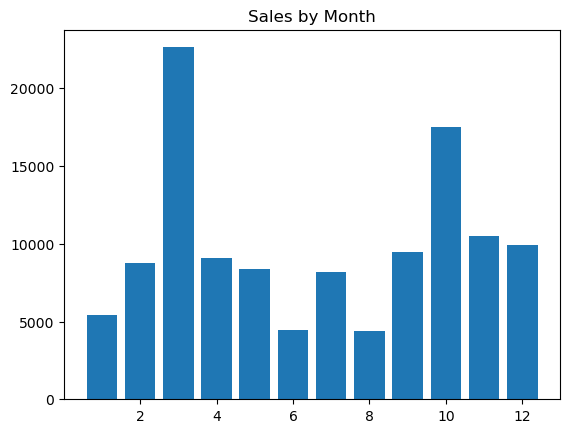

In [29]:
x = sales_df["Month"]
y = sales_df["Sales"]

plt.bar(x, y)
plt.title("Sales by Month")
plt.show()

In [44]:
sales_by_category = sales_df.groupby("Category").size().reset_index(name="count")
sales_by_category
sales_by_category_pivot = pd.pivot_table(sales_df, index = "Category", values="Sales", aggfunc="count")
sales_by_category_pivot

,Sales
Category,
Furniture,2078
Office Supplies,5909
Technology,1813


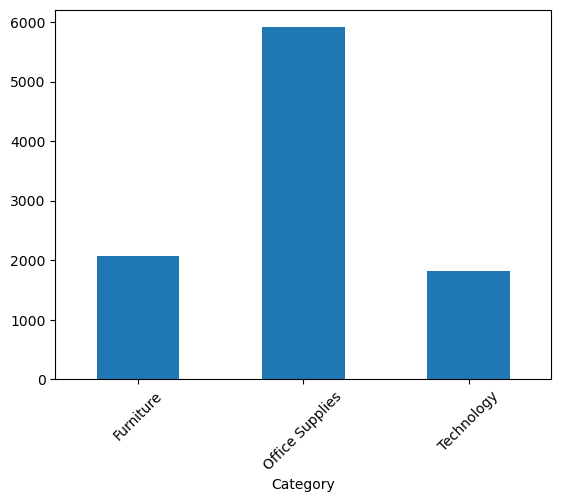

In [47]:
sales_by_category_pivot.plot(kind="bar", legend=None)
plt.xticks(rotation=45)
plt.show()
